In [44]:
testrun = 'run6'
testname = 'latency1' #'latency1' or 'latency2'

testStat = 'latency_5m_single_transactions'
#testStat = 'latency_5m_single_transactions.transactions_LOCAL_RPC'


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We use larger plot areas, adjust to your needs.

plt.rcParams["figure.figsize"] = (25, 15)

import seaborn as sns
sns.set(style="darkgrid")


In [46]:

def addCalcedColumns(df):
    df['durationSendToConfirmation'] = df['timeReceipt'] - df['timeSend']    


#filepathAura = 'data/aura/' + testrun + '/' + testname +  '/' + testStat + '.transactions.csv'
filepathHbbft = 'data/hbbft/' + testrun + '/' + testname +  '/' + testStat + '.transactions.csv'
# dfAura = pd.read_csv(filepathAura)
dfHbbft = pd.read_csv(filepathHbbft)



# addCalcedColumns(dfAura)
addCalcedColumns(dfHbbft)


dfHbbft.head()


,internalTxID,transactionHash,blockNumber,timeSend,timeReceipt,timeConfirmed,durationSendToConfirmation
0,1,0xfc15e9927c23e0961ade0377a6d9a6d3b02d9217d26a...,13296,1586005005075,1586005006468,1586005006467,1393
1,2,0xab4feb55a2e7aa2d4636b4859e25585ca697fab17855...,13297,1586005007426,1586005007711,1586005007710,285
2,3,0x2c0b4d1316b4acfc753a2c55a02ec4152e5b808151b5...,13299,1586005010569,1586005010866,1586005010865,297
3,4,0x6b881b9b5b3fecdc8a63276ba527f06532e109c24c15...,13300,1586005015050,1586005015432,1586005015432,382
4,5,0xef0c5d6fd9936a93a459019deb6c88963be3509af13b...,13301,1586005019530,1586005019854,1586005019854,324


Text(0, 0.5, 'waittime in ms')

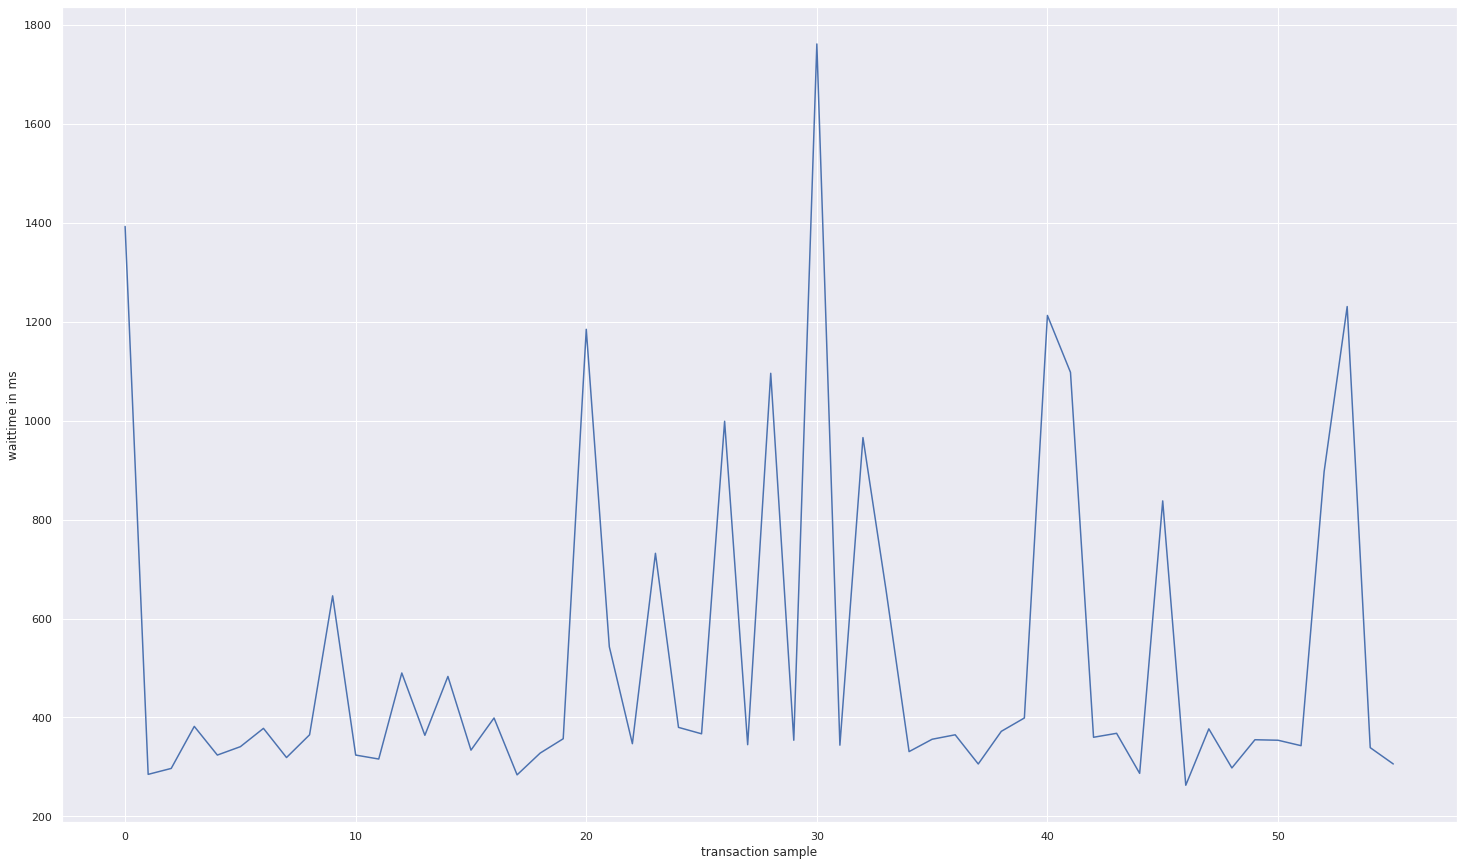

In [47]:
plot = plt.plot(dfHbbft.durationSendToConfirmation)

plt.xlabel('transaction sample')
plt.ylabel('waittime in ms')

    
#plot = plt.plot(dfAura.durationSendToConfirmation)

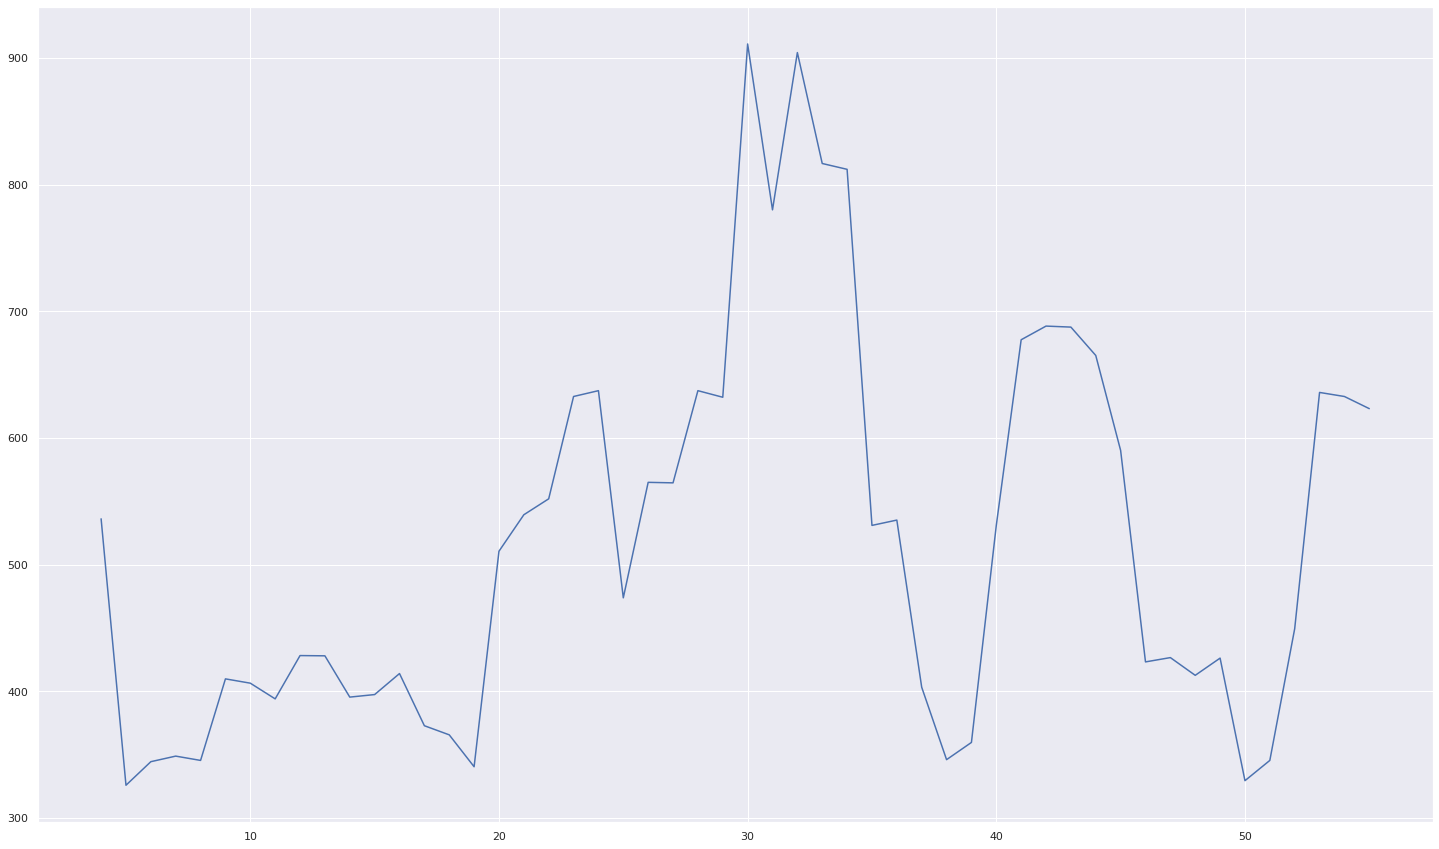

In [48]:
plot = plt.plot(dfHbbft.durationSendToConfirmation.rolling(window=5).mean())
#plot = plt.plot(dfAura.durationSendToConfirmation.rolling(window=5).mean())